In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow.keras as tf
import tensorflowjs as tfjs

In [2]:
def read_and_preprocess(img_path):
    img = cv2.imread(img_path, 0)
    img = np.array(img, dtype='float32') 
    img = cv2.resize(img,(28,28))
    img = img.reshape(28,28,1)
    img = img/255
    return img

In [3]:
im=cv2.imread('Train/character_10_yna/10542.png',0)
im = cv2.resize(im,(28,28))
#plt.imshow(im)

In [4]:
im=im.reshape(28,28,1)

In [5]:
train_path="Train/"
X_train=[]
y_train=[]
for folder in os.scandir(train_path):
    for entry in os.scandir(train_path+folder.name):
        X_train.append(read_and_preprocess(train_path + folder.name + '/' + entry.name))
        y_train.append(folder.name)

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y_train=LE.fit_transform(np.array(y_train))

In [7]:
LE.inverse_transform(np.unique(y_train))

array(['character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_1_ka', 'character_20_na',
       'character_21_pa', 'character_22_pha', 'character_23_ba',
       'character_24_bha', 'character_25_ma', 'character_26_yaw',
       'character_27_ra', 'character_28_la', 'character_29_waw',
       'character_2_kha', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'character_3_ga', 'character_4_gha',
       'character_5_kna', 'character_6_cha', 'character_7_chha',
       'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1',
       'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7',
       'digit_8', 'digit_9'], dtype='<U25')

In [8]:
LABEL={}
array=LE.inverse_transform(np.unique(y_train))
for i in range(46):
    LABEL[i]=array[i]
LABEL

{0: 'character_10_yna',
 1: 'character_11_taamatar',
 2: 'character_12_thaa',
 3: 'character_13_daa',
 4: 'character_14_dhaa',
 5: 'character_15_adna',
 6: 'character_16_tabala',
 7: 'character_17_tha',
 8: 'character_18_da',
 9: 'character_19_dha',
 10: 'character_1_ka',
 11: 'character_20_na',
 12: 'character_21_pa',
 13: 'character_22_pha',
 14: 'character_23_ba',
 15: 'character_24_bha',
 16: 'character_25_ma',
 17: 'character_26_yaw',
 18: 'character_27_ra',
 19: 'character_28_la',
 20: 'character_29_waw',
 21: 'character_2_kha',
 22: 'character_30_motosaw',
 23: 'character_31_petchiryakha',
 24: 'character_32_patalosaw',
 25: 'character_33_ha',
 26: 'character_34_chhya',
 27: 'character_35_tra',
 28: 'character_36_gya',
 29: 'character_3_ga',
 30: 'character_4_gha',
 31: 'character_5_kna',
 32: 'character_6_cha',
 33: 'character_7_chha',
 34: 'character_8_ja',
 35: 'character_9_jha',
 36: 'digit_0',
 37: 'digit_1',
 38: 'digit_2',
 39: 'digit_3',
 40: 'digit_4',
 41: 'digit_5',
 

In [9]:
import random
mapp=list(zip(X_train,y_train))
random.shuffle(mapp)
X_train,y_train=zip(*mapp)

In [10]:
X_train=list(X_train)
y_train=list(y_train)

In [11]:
len(X_train)

78200

In [12]:
X_val=X_train[0:11730]
X_train=X_train[11730:]
y_val=y_train[0:11730]
y_train=y_train[11730:]

In [13]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape
y_train.shape

(66470,)

In [14]:
X_val=np.array(X_val)
y_val=np.array(y_val)
y_val[0:5]

array([35, 31, 17, 35, 45], dtype=int64)


### Convolution 1. Input = 28x28x3.   Output = 24x24x64 

### Max Pool 1.    Input = 24x24x64   Output = 12x12x64

### Convolution 2. Input = 12x12x64   Output = 10x10x128

### Max Pool 2.    Input = 10x10x128. Output = 5x5x128

### Dropout          Input = 5x5x128.   Output = 5x5x128

### Fully Connected 1. Output = 3200

### Fully Connected 2. Output = 1024

### Fully Connected 3. Output = 128

### Fully Connected 4. Output = 46


In [15]:
model = tf.Sequential()
model.add(tf.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1), name="Convolution-1"))
model.add(tf.layers.MaxPooling2D((2,2),name="Pool-1"))
model.add(tf.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="Convolution-2"))
model.add(tf.layers.MaxPooling2D((2,2), name="Pool-2"))
model.add(tf.layers.Dropout(0.2))
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(units=1024, activation='relu', name="Dense-1"))
model.add(tf.layers.Dense(units=128, activation='relu', name="Dense-2"))
model.add(tf.layers.Dense(units=46, activation = 'softmax', name="Output"))

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val,y_val))

Epoch 1/10
665/665 [==============================] - 79s 118ms/step - loss: 0.5726 - accuracy: 0.8381 - val_loss: 0.2039 - val_accuracy: 0.9395
Epoch 2/10
665/665 [==============================] - 76s 114ms/step - loss: 0.1264 - accuracy: 0.9607 - val_loss: 0.1174 - val_accuracy: 0.9639
Epoch 3/10
665/665 [==============================] - 77s 115ms/step - loss: 0.0744 - accuracy: 0.9760 - val_loss: 0.0880 - val_accuracy: 0.9737
Epoch 4/10
665/665 [==============================] - 76s 114ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0983 - val_accuracy: 0.9719
Epoch 5/10
665/665 [==============================] - 77s 116ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0942 - val_accuracy: 0.9731
Epoch 6/10
665/665 [==============================] - 77s 116ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0833 - val_accuracy: 0.9777
Epoch 7/10
665/665 [==============================] - 77s 115ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0770 - val_ac

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution-1 (Conv2D)       (None, 24, 24, 64)        1664      
_________________________________________________________________
Pool-1 (MaxPooling2D)        (None, 12, 12, 64)        0         
_________________________________________________________________
Convolution-2 (Conv2D)       (None, 10, 10, 128)       73856     
_________________________________________________________________
Pool-2 (MaxPooling2D)        (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
Dense-1 (Dense)              (None, 1024)              3

In [18]:
test_path="Test/"
X_test=[]
y_test=[]
for folder in os.scandir(test_path):
    for entry in os.scandir(test_path+folder.name):
        X_test.append(read_and_preprocess(test_path + folder.name + '/' + entry.name))
        y_test.append(folder.name)

In [19]:
import random
mapp=list(zip(X_test,y_test))
random.shuffle(mapp)
X_test,y_test=zip(*mapp)

In [20]:
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test.shape
y_test.shape

(13800,)

In [21]:
y_test=LE.transform(y_test)
y_test=y_test.reshape((-1,1))

In [22]:
model.evaluate(X_test,y_test)

432/432 [==============================] - 5s 12ms/step - loss: 0.0792 - accuracy: 0.9801


[0.07921891659498215, 0.9801449179649353]

In [24]:
tfjs.converters.save_keras_model(model, "finalmodel/Hindi.h5")

In [25]:
X_test.shape

(13800, 28, 28, 1)

['character_32_patalosaw']


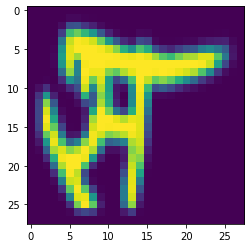

In [35]:
plt.imshow(X_test[0])
print(LE.inverse_transform(y_test[0]))

In [48]:
output=model(np.expand_dims(np.array(read_and_preprocess('2.jpeg')),axis=0))

In [49]:
OUT={}
for i in range(46):
    OUT[i+1]=np.array(output).reshape(46,1)[i]

In [50]:
OUT

{1: array([1.5722904e-05], dtype=float32),
 2: array([9.739637e-05], dtype=float32),
 3: array([0.0004797], dtype=float32),
 4: array([0.00021654], dtype=float32),
 5: array([1.8597872e-05], dtype=float32),
 6: array([0.00012581], dtype=float32),
 7: array([4.0244067e-05], dtype=float32),
 8: array([0.0069521], dtype=float32),
 9: array([2.805973e-05], dtype=float32),
 10: array([0.0002885], dtype=float32),
 11: array([0.01413947], dtype=float32),
 12: array([0.00124843], dtype=float32),
 13: array([0.00016234], dtype=float32),
 14: array([0.00144078], dtype=float32),
 15: array([0.43280342], dtype=float32),
 16: array([0.097803], dtype=float32),
 17: array([0.0002769], dtype=float32),
 18: array([0.00266376], dtype=float32),
 19: array([0.00072037], dtype=float32),
 20: array([0.00081306], dtype=float32),
 21: array([0.00035855], dtype=float32),
 22: array([0.01386688], dtype=float32),
 23: array([3.9512866e-05], dtype=float32),
 24: array([0.2701452], dtype=float32),
 25: array([0.00

In [51]:
kmax=max(zip(OUT.values(), OUT.keys()))[1]

In [52]:
kmax

15

In [53]:
LE.inverse_transform(np.array([kmax]))

array(['character_24_bha'], dtype='<U25')